In [32]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import folium
from folium.plugins import MiniMap
plt.style.use('ggplot')

In [31]:
!pip install missingno

In [57]:
df=pd.read_csv("project dataset.csv")
df

,Moment,number,web,Name of Provider,Number of Comments,Expected Delivery Time,Minimum Charge Ordering,Cost Delivery,Latitude,Longitude,Typical Traffic Afternoon,Typical Traffic Noon,Typical Traffic Morning,DailyTraffic,ClientLatitude,ClientLongitude,Distance(mts),Time(sec),Time(min)
0,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329,45.0,9900.0,3500.0,4.665970,-74.055580,Red,Orange,Green,ROG,4.665798,-74.040855,2500,660,11
1,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329,45.0,9900.0,3500.0,4.665970,-74.055580,Red,Orange,Green,ROG,4.666159,-74.038331,3300,720,12
2,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329,45.0,9900.0,3500.0,4.665970,-74.055580,Red,Orange,Green,ROG,4.670228,-74.026783,9100,1740,29
3,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329,45.0,9900.0,3500.0,4.665970,-74.055580,Red,Orange,Green,ROG,4.662140,-74.008008,9700,1740,29
4,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329,45.0,9900.0,3500.0,4.665970,-74.055580,Red,Orange,Green,ROG,4.669905,-74.104917,8800,1320,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19929,Afternoon,752,https://domicilios.com/bogota/a-mordiscos-2.ht...,A Mordiscos,0,45.0,NaN,3000.0,4.631854,-74.084877,Green,Orange,Orange,GOO,4.634703,-74.142852,7900,1020,17
19930,Afternoon,752,https://domicilios.com/bogota/a-mordiscos-2.ht...,A Mordiscos,0,45.0,NaN,3000.0,4.631854,-74.084877,Green,Orange,Orange,GOO,4.635067,-74.028594,24700,3420,57
19931,Afternoon,752,https://domicilios.com/bogota/a-mordiscos-2.ht...,A Mordiscos,0,45.0,NaN,3000.0,4.631854,-74.084877,Green,Orange,Orange,GOO,4.631293,-74.069551,2900,600,10
19932,Afternoon,752,https://domicilios.com/bogota/a-mordiscos-2.ht...,A Mordiscos,0,45.0,NaN,3000.0,4.631854,-74.084877,Green,Orange,Orange,GOO,4.634237,-74.113468,4200,660,11


<AxesSubplot:xlabel='Cost Delivery'>

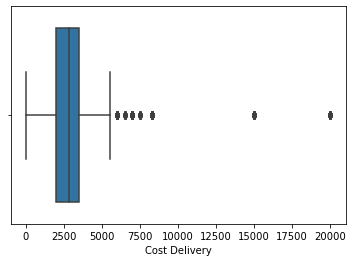

In [6]:
sns.boxplot(df["Cost Delivery"])

In [7]:
df.columns

Index(['Moment', 'number', 'web', 'Name of Provider', 'Number of Comments',
       'Expected Delivery Time', 'Minimum Charge Ordering', 'Cost Delivery',
       'Latitude', 'Longitude', 'Typical Traffic Afternoon',
       'Typical Traffic Noon', 'Typical Traffic Morning', 'DailyTraffic',
       'ClientLatitude', 'ClientLongitude', 'Distance(mts)', 'Time(sec)',
       'Time(min)'],
      dtype='object')

In [8]:
df.isna().sum()

Moment                          0
number                          0
web                             0
Name of Provider             1376
Number of Comments           5183
Expected Delivery Time       1400
Minimum Charge Ordering      3028
Cost Delivery                5663
Latitude                        0
Longitude                       0
Typical Traffic Afternoon       0
Typical Traffic Noon            0
Typical Traffic Morning         0
DailyTraffic                    0
ClientLatitude                  0
ClientLongitude                 0
Distance(mts)                   0
Time(sec)                       0
Time(min)                       0
dtype: int64

In [9]:
mean_value=df["Minimum Charge Ordering"].mean()
mean_value

13050.040222406245

In [10]:
mean_value=df["Expected Delivery Time"].mean()
mean_value

44.59177727419877

In [11]:
df["Minimum Charge Ordering"].fillna(mean_value,inplace=True)

In [12]:
df["Expected Delivery Time"].fillna(mean_value,inplace=True)

In [13]:
df.isnull().sum()

Moment                          0
number                          0
web                             0
Name of Provider             1376
Number of Comments           5183
Expected Delivery Time          0
Minimum Charge Ordering         0
Cost Delivery                5663
Latitude                        0
Longitude                       0
Typical Traffic Afternoon       0
Typical Traffic Noon            0
Typical Traffic Morning         0
DailyTraffic                    0
ClientLatitude                  0
ClientLongitude                 0
Distance(mts)                   0
Time(sec)                       0
Time(min)                       0
dtype: int64

In [14]:
mean_value=df["Minimum Charge Ordering"].mean()
mean_value

11074.496031984521

In [15]:
df["Minimum Charge Ordering"].fillna(mean_value,inplace=True)

In [16]:
df1=df.dropna()
df1.isnull().sum()

Moment                       0
number                       0
web                          0
Name of Provider             0
Number of Comments           0
Expected Delivery Time       0
Minimum Charge Ordering      0
Cost Delivery                0
Latitude                     0
Longitude                    0
Typical Traffic Afternoon    0
Typical Traffic Noon         0
Typical Traffic Morning      0
DailyTraffic                 0
ClientLatitude               0
ClientLongitude              0
Distance(mts)                0
Time(sec)                    0
Time(min)                    0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19934 entries, 0 to 19933
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Moment                     19934 non-null  object 
 1   number                     19934 non-null  int64  
 2   web                        19934 non-null  object 
 3   Name of Provider           18558 non-null  object 
 4   Number of Comments         14751 non-null  object 
 5   Expected Delivery Time     19934 non-null  float64
 6   Minimum Charge Ordering    19934 non-null  float64
 7   Cost Delivery              14271 non-null  float64
 8   Latitude                   19934 non-null  float64
 9   Longitude                  19934 non-null  float64
 10  Typical Traffic Afternoon  19934 non-null  object 
 11  Typical Traffic Noon       19934 non-null  object 
 12  Typical Traffic Morning    19934 non-null  object 
 13  DailyTraffic               19934 non-null  obj

<AxesSubplot:xlabel='Cost Delivery'>

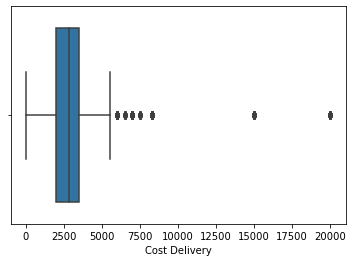

In [18]:
sns.boxplot(df["Cost Delivery"])

<AxesSubplot:xlabel='Latitude'>

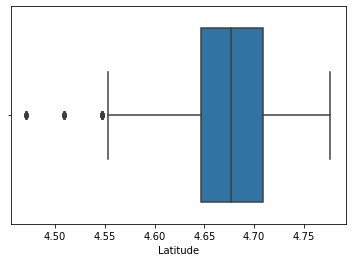

In [19]:
sns.boxplot(df["Latitude"])

<AxesSubplot:xlabel='Minimum Charge Ordering'>

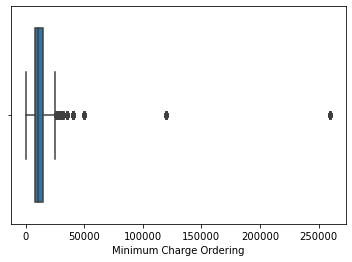

In [20]:
sns.boxplot(df["Minimum Charge Ordering"])

<AxesSubplot:xlabel='Expected Delivery Time'>

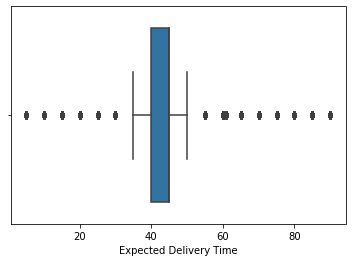

In [21]:
sns.boxplot(df["Expected Delivery Time"])

In [22]:
## We select the categorical and numeric variables to plot.

# Numerical variables:
cat_cols = ['Moment', 'web', 'Name_of_Provider', 'Typical_Traffic_Afternoon',
            'Typical_Traffic_Noon', 'Typical_Traffic_Morning', 'DailyTraffic']

# Categorical variables:
num_cols = ['number', 'Number_of_Comments', 'Expected_Delivery_Time', 'Minimum_Charge_Ordering',
            'Cost_Delivery', 'Latitude', 'Longitude', 'ClientLatitude', 'ClientLongitude',
            'Distance(mts)', 'Time(sec)', 'Time(min)']

In [78]:
# Now we visualize the values that each categorical variable takes.
print("=="*30)
print(f"Total Categorical Variables = {len(cat_cols)}")
print("=="*30)
for cat_col in cat_cols:
    print(f"* {cat_col} ==> {df[cat_col].nunique()} unique values")

Total Categorical Variables = 7


IndexError: invalid index to scalar variable.

In [72]:
# Now we visualize the numeric variables.
print("=="*30)
print(f"Total Numerical Variables = {len(num_cols)}")
print("=="*30)
for num_col in num_cols:
  print(f"* {num_col}")

Total Numerical Variables = 12
* number
* Number_of_Comments
* Expected_Delivery_Time
* Minimum_Charge_Ordering
* Cost_Delivery
* Latitude
* Longitude
* ClientLatitude
* ClientLongitude
* Distance(mts)
* Time(sec)
* Time(min)


In [ ]:
# Now we visualize the numeric variables.
print("=="*30)
print(f"Total Numerical Variables = {len(num_cols)}")
print("=="*30)
for num_col in num_cols:
  print(f"* {num_col}")

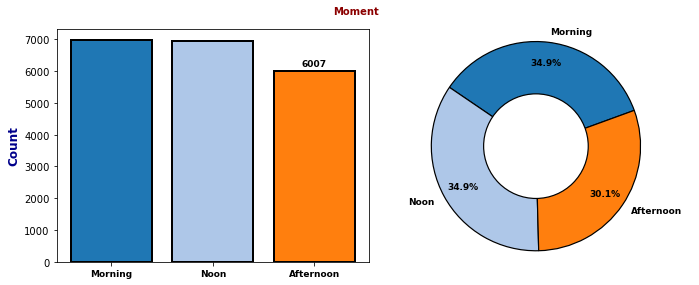

In [24]:
# We define the size of our figure.
fig,ax = plt.subplots(1,2,figsize=(10,4))

# 1. We create our dataframe that contains our data to be displayed.
df_plot_moment = df[cat_cols[0]].value_counts().to_frame()

# 2. We generate the values of our graphs.
values = df_plot_moment.iloc[:,0]
# 3. We generate the labels for our charts.
labels = df_plot_moment.index.to_list()
# 4. We generate the color map.
cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(labels)))


# 2. Bar chart.
rects = ax[0].bar(labels, values, color = colors,
                  edgecolor = 'black', linewidth = 2.0)

ax[0].set_ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax[0].set_xticklabels(labels, fontsize = 9, fontweight = 'bold')

# function to label our bars.
def autolabel(rects):
    for rect in rects:
         height = rect.get_height()
    ax[0].annotate(text = '{}'.format(height),
                xy = (rect.get_x() + rect.get_width()/2., height-0.005),
                xytext = (0,3),
                textcoords = 'offset points',
                va = 'bottom',
                ha = 'center',
                weight = 'bold',
                size = 9,
                color = 'black')

autolabel(rects) # we label our bars.


# Pie chart
# explosion
explode = (0, 0, 0)

ax[1].pie(x = values, labels = labels , startangle = 20,
          autopct = '%.1f%%', colors = colors, wedgeprops={'linewidth':1.2,'edgecolor':'black'},
          textprops = {'color':'black', 'weight':'bold','fontsize':9}, explode = explode, pctdistance = 0.8)

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc='white', edgecolor = 'black', linewidth = 1.2)
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
ax[1].axis('equal')

fig.suptitle(f"{cat_cols[0]}", fontsize = 10, fontweight = 'bold', color = 'darkred')

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

In [26]:
# Configuramos el nombre de las columnas
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Moment', 'number', 'web', 'Name_of_Provider', 'Number_of_Comments',
       'Expected_Delivery_Time', 'Minimum_Charge_Ordering', 'Cost_Delivery',
       'Latitude', 'Longitude', 'Typical_Traffic_Afternoon',
       'Typical_Traffic_Noon', 'Typical_Traffic_Morning', 'DailyTraffic',
       'ClientLatitude', 'ClientLongitude', 'Distance(mts)', 'Time(sec)',
       'Time(min)'],
      dtype='object')

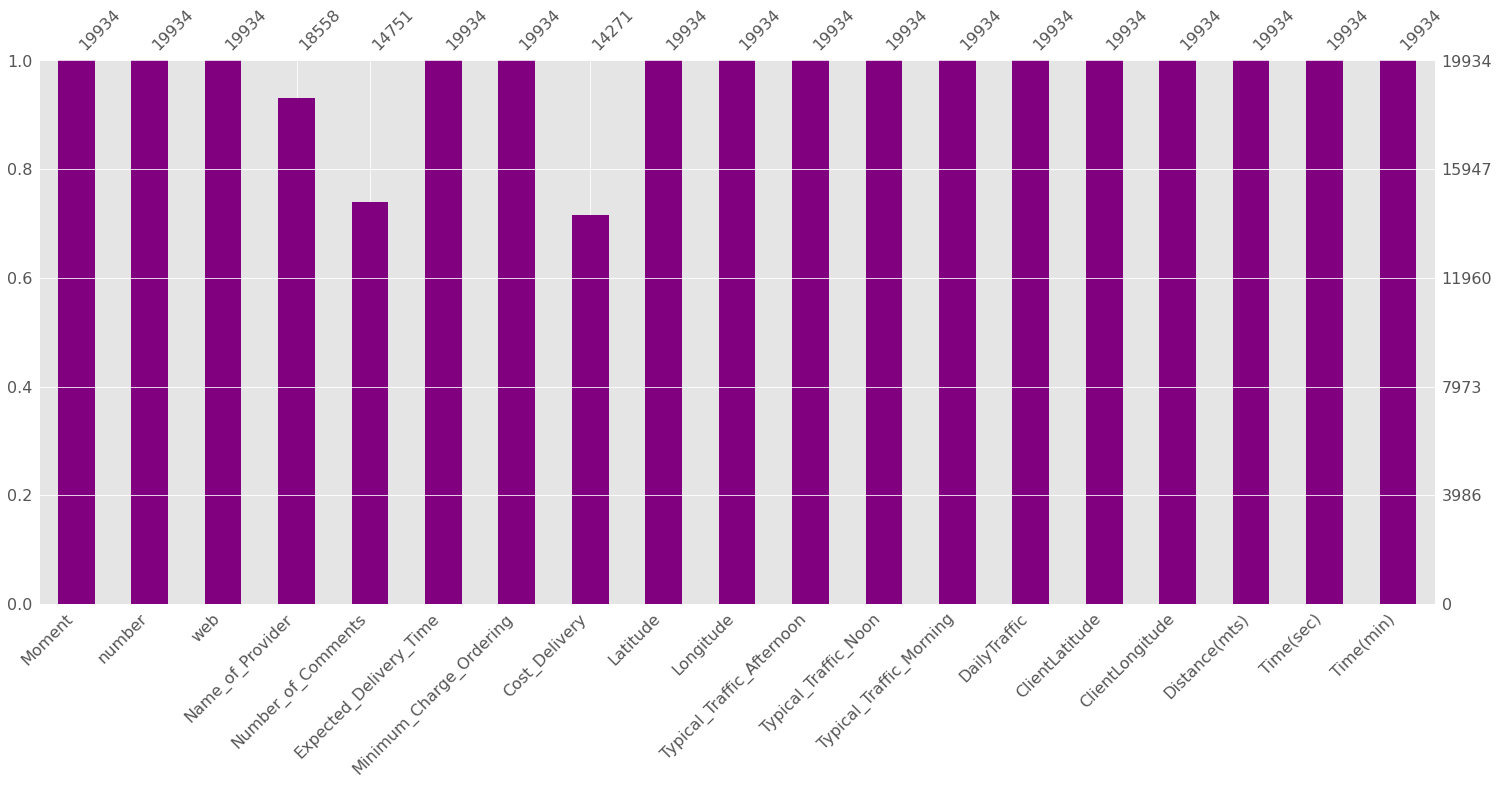

In [34]:
# Checking null values version 1
ms.bar(df, color = 'purple')
plt.show()

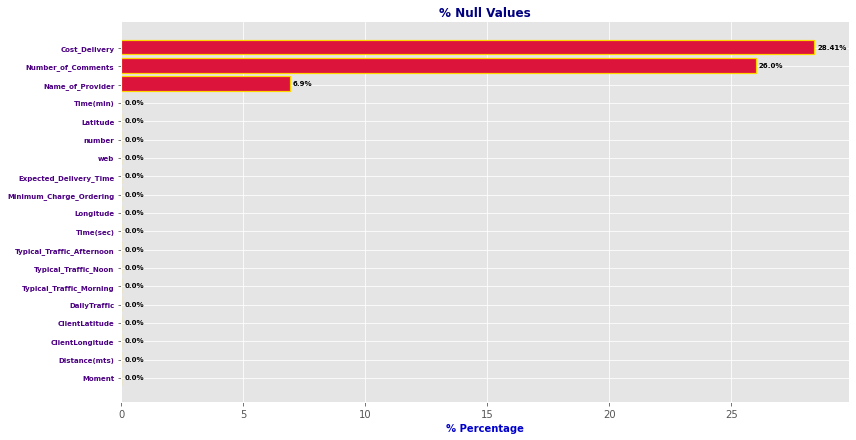

In [37]:
df_null_values = df.isnull().sum().to_frame().rename(columns={0:'Count'})
df_null_values['Porcentaje_nulos'] = (df_null_values['Count']/len(df))*100.
df_null_values['Porcentaje_no_nulos'] = 100.-df_null_values['Porcentaje_nulos']
df_null_values = df_null_values.sort_values('Porcentaje_nulos', ascending = True)


n = len(df_null_values.index)
x = np.arange(n)

fig,ax = plt.subplots(figsize=(12,6.5))

rects1 = ax.barh(x,
                 df_null_values.iloc[:,1],
                 label='% Null values',
                 linewidth = 1.2,
                 edgecolor='gold',
                 color='#DC143C')


ax.set_title('% Null Values',fontsize=12, fontweight='bold', color = '#000080')
ax.set_xlabel('% Percentage',fontsize=10, fontweight='bold', color = '#0000CD')
ax.set_yticks(x-0.05)
ax.set_yticklabels(df_null_values.index, fontsize=7, fontweight='bold',color='#4B0082')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


def autolabel(rects):
  for rect in rects:
      width = rect.get_width()
      ax.annotate('{}%'.format(round(width,2)),
                  xy=(width, rect.get_y() + rect.get_height() / 2),
                  xytext=(3,0),
                  textcoords="offset points",
                  ha='left', va='center', size = 7, weight = 'bold')

autolabel(rects1)

fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.show()

In [40]:
# Checking duplicate rows
print(f'There are {df.duplicated().sum()} duplicate rows')

There are 0 duplicate rows


In [12]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Sample data
data = np.array([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(data)

print("Original Data:")
print(data)
print("\nNormalized Data:")
print(normalized_data)

Original Data:
[[1. 2.]
 [3. 4.]
 [5. 6.]]

Normalized Data:
[[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]


In [69]:
df=df.isna().sum()
df

0

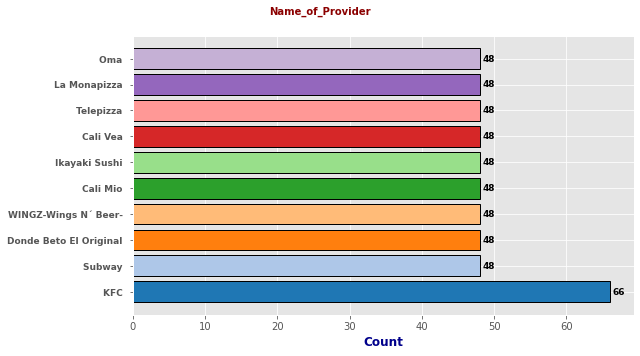

In [43]:
# We define the size of our figure.
fig,ax = plt.subplots(figsize=(9,5))

# 1. We create our dataframe that contains our data to be displayed.
df_plot_provider = df[cat_cols[2]].value_counts().to_frame().head(10)

# 2. We generate the values of our graphs.
values = df_plot_provider.iloc[:,0]
# 3. We generate the labels for our charts.
labels = df_plot_provider.index.to_list()
# 4. We generate the color map.
cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(labels)))


# 2. Bar chart.
rects = ax.barh(labels, values, color = colors,
                  edgecolor = 'black', linewidth = 1.0)

ax.set_xlabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_yticklabels(labels, fontsize = 9, fontweight = 'bold')

# function to label our bars.
def autolabel(rects):
  for rect in rects:
    width = rect.get_width()
    ax.annotate(text = '{}'.format(width),
                xy = (width, rect.get_y() + rect.get_height()/2.),
                xytext = (3,0),
                textcoords = 'offset points',
                va = 'center',
                ha = 'left',
                weight = 'bold',
                size = 9,
                color = 'black')

autolabel(rects) # we label our bars.


fig.suptitle(f"{cat_cols[2]}", fontsize = 10, fontweight = 'bold', color = 'darkred')

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

In above fig we conclude that their is count of KFC provider is high ..In future we have collaboration oppourtunities for this

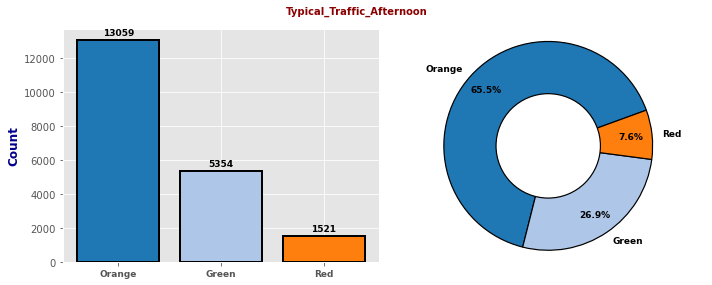

In [45]:
# We define the size of our figure.
fig,ax = plt.subplots(1,2,figsize=(10,4))

# 1. We create our dataframe that contains our data to be displayed.
df_plot_traffic = df[cat_cols[3]].value_counts().to_frame()

# 2. We generate the values of our graphs.
values = df_plot_traffic.iloc[:,0]
# 3. We generate the labels for our charts.
labels = df_plot_traffic.index.to_list()
# 4. We generate the color map.
cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(labels)))


# 2. Bar chart.
rects = ax[0].bar(labels, values, color = colors,
                  edgecolor = 'black', linewidth = 2.0)

ax[0].set_ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax[0].set_xticklabels(labels, fontsize = 9, fontweight = 'bold')

# function to label our bars.
def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax[0].annotate(text = '{}'.format(height),
                xy = (rect.get_x() + rect.get_width()/2., height-0.005),
                xytext = (0,3),
                textcoords = 'offset points',
                va = 'bottom',
                ha = 'center',
                weight = 'bold',
                size = 9,
                color = 'black')

autolabel(rects) # we label our bars.

# Pie chart
# explosion
explode = (0, 0, 0)

ax[1].pie(x = values, labels = labels , startangle = 20,
          autopct = '%.1f%%', colors = colors, wedgeprops={'linewidth':1.2,'edgecolor':'black'},
          textprops = {'color':'black', 'weight':'bold','fontsize':9}, explode = explode, pctdistance = 0.8)

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc='white', edgecolor = 'black', linewidth = 1.2)
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
ax[1].axis('equal')

fig.suptitle(f"{cat_cols[3]}", fontsize = 10, fontweight = 'bold', color = 'darkred')

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

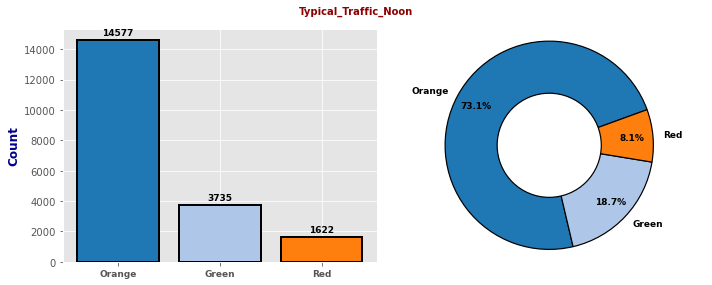

In [47]:
# We define the size of our figure.
fig,ax = plt.subplots(1,2,figsize=(10,4))

# 1. We create our dataframe that contains our data to be displayed.
df_plot_traffic = df[cat_cols[4]].value_counts().to_frame()

# 2. We generate the values of our graphs.
values = df_plot_traffic.iloc[:,0]
# 3. We generate the labels for our charts.
labels = df_plot_traffic.index.to_list()
# 4. We generate the color map.
cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(labels)))


# 2. Bar chart.
rects = ax[0].bar(labels, values, color = colors,
                  edgecolor = 'black', linewidth = 2.0)

ax[0].set_ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax[0].set_xticklabels(labels, fontsize = 9, fontweight = 'bold')

# function to label our bars.
def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax[0].annotate(text = '{}'.format(height),
                xy = (rect.get_x() + rect.get_width()/2., height-0.005),
                xytext = (0,3),
                textcoords = 'offset points',
                va = 'bottom',
                ha = 'center',
                weight = 'bold',
                size = 9,
                color = 'black')

autolabel(rects) # we label our bars.

# Pie chart
# explosion
explode = (0, 0, 0)

ax[1].pie(x = values, labels = labels , startangle = 20,
          autopct = '%.1f%%', colors = colors, wedgeprops={'linewidth':1.2,'edgecolor':'black'},
          textprops = {'color':'black', 'weight':'bold','fontsize':9}, explode = explode, pctdistance = 0.8)

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc='white', edgecolor = 'black', linewidth = 1.2)
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
ax[1].axis('equal')

fig.suptitle(f"{cat_cols[4]}", fontsize = 10, fontweight = 'bold', color = 'darkred')

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

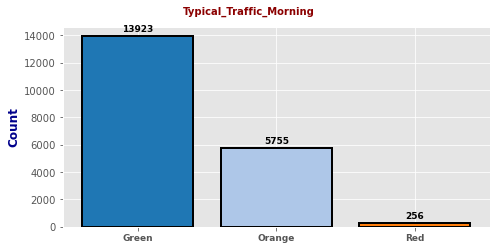

In [48]:
# We define the size of our figure.
fig,ax = plt.subplots(figsize=(7,3.5))

# 1. We create our dataframe that contains our data to be displayed.
df_plot_traffic = df[cat_cols[5]].value_counts().to_frame()

# 2. We generate the values of our graphs.
values = df_plot_traffic.iloc[:,0]
# 3. We generate the labels for our charts.
labels = df_plot_traffic.index.to_list()
# 4. We generate the color map.
cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(labels)))


# 2. Bar chart.
rects = ax.bar(labels, values, color = colors,
                  edgecolor = 'black', linewidth = 2.0)

ax.set_ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_xticklabels(labels, fontsize = 9, fontweight = 'bold')

# function to label our bars.
def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.annotate(text = '{}'.format(height),
                xy = (rect.get_x() + rect.get_width()/2., height-0.005),
                xytext = (0,3),
                textcoords = 'offset points',
                va = 'bottom',
                ha = 'center',
                weight = 'bold',
                size = 9,
                color = 'black')

autolabel(rects) # we label our bars.


fig.suptitle(f"{cat_cols[5]}", fontsize = 10, fontweight = 'bold', color = 'darkred')

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

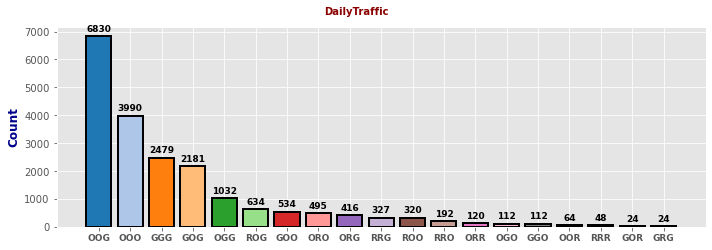

In [49]:
# We define the size of our figure.
fig,ax = plt.subplots(figsize=(10,3.5))

# 1. We create our dataframe that contains our data to be displayed.
df_plot_daily = df[cat_cols[6]].value_counts().to_frame()

# 2. We generate the values of our graphs.
values = df_plot_daily.iloc[:,0]
# 3. We generate the labels for our charts.
labels = df_plot_daily.index.to_list()
# 4. We generate the color map.
cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(labels)))


# 2. Bar chart.
rects = ax.bar(labels, values, color = colors,
                  edgecolor = 'black', linewidth = 2.0)

ax.set_ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_xticklabels(labels, fontsize = 9, fontweight = 'bold')

# function to label our bars.
def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.annotate(text = '{}'.format(height),
                xy = (rect.get_x() + rect.get_width()/2., height-0.005),
                xytext = (0,3),
                textcoords = 'offset points',
                va = 'bottom',
                ha = 'center',
                weight = 'bold',
                size = 9,
                color = 'black')

autolabel(rects) # we label our bars.


fig.suptitle(f"{cat_cols[6]}", fontsize = 10, fontweight = 'bold', color = 'darkred')

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

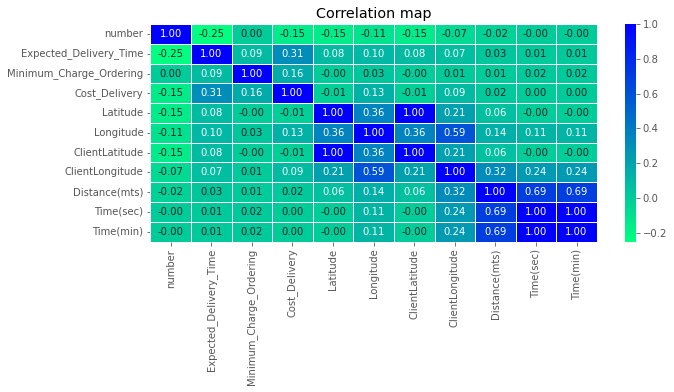

In [51]:
# Checking the correlation matrix
plt.figure(figsize=(10, 4))
sns.heatmap(df.corr(), annot=True, cmap='winter_r', fmt='.2f', linewidths=1)
plt.title("Correlation map")
plt.savefig('Correlation map.png')
plt.show()

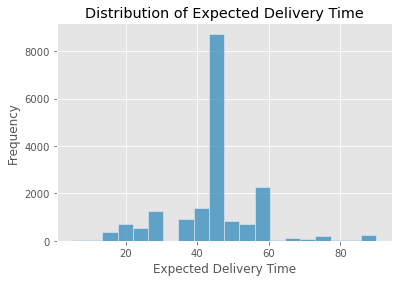

In [64]:
#  Plotting the distribution of Expected Delivery Time
sns.histplot(data=df, x='Expected Delivery Time', bins=20)
plt.title('Distribution of Expected Delivery Time')
plt.xlabel('Expected Delivery Time')
plt.ylabel('Frequency')
plt.savefig('Distribution of Expected Delivery Time.png')
plt.show()

In [65]:
# Calculate and Print Results

# Calculate the average delivery time
average_delivery_time = df['Expected Delivery Time'].mean()
print(f"Average Delivery Time: {average_delivery_time:.2f} minutes")



Average Delivery Time: 44.59 minutes
